<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>Feature Scaling</b>
        </p>
</div>

<div class="alert alert-block alert-info" style="font-size:16px; font-family:nexa;">
    Feature Engineering is a big part of Data Science and Machine Learning. Feature Scaling is one of the last steps in the whole life cycle of Feature Engineering. It is a technique to standardize the independent features in a data in a fixed range or scale. Thus the name Feature Scaling.<br>
    In simple words, once we are done with all the other steps of feature engineering, like ecoding variables, handling missing values etc, then we scale all the variable to a very small range of say -1 to +1. So all the data gets squeezed to decimal points between -1 and +1. What it does is keep the distribution of the data, the correlation and covariance absolutely the same however scales every independent or the feature matrix columns to a smaller scale. We do this as most of the ML algorithms problems perform significantly better after scaling. 
</div>

***
### Types of Feature Scaling:
   * <b>Standardization:</b>
       - Standard Scaler
   * <b>Normalization:</b>
       - Min Max Scaling
       - Mean Normalization
       - Max Absolute Scaling
       - Robust Scaling *etc.*
***

<div style="font-size:16px; 
            display:fill;
            border-radius:5px;
            font-family:Nexa; 
            line-height: 1.7em;
            background-color:#FFD0D2">
    <p style="padding: 8px;
              color:black;">
    We will now implement this and see the results for ourselves
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(palette="rainbow", style="darkgrid")

%matplotlib inline

In [6]:
df = pd.read_csv("./Datasets/FeartureScalingPractice.csv", usecols=["Age", "Fare"])

In [7]:
print("Missing Values:")
for col in df.columns:
    missing = df[col].isna().sum()
    percent = missing / df.shape[0] * 100
    print("%s: %.2f%% (%d)" % (col,percent,missing))

Missing Values:
Age: 19.87% (177)
Fare: 0.00% (0)


In [8]:
from sklearn.impute import SimpleImputer

# Mean Imputation for numeric columns
mean_imputer = SimpleImputer(strategy='mean')
df[['Fare', 'Age']] = mean_imputer.fit_transform(df[['Fare', 'Age']])

In [9]:
print("Missing Values:")
for col in df.columns:
    missing = df[col].isna().sum()
    percent = missing / df.shape[0] * 100
    print("%s: %.2f%% (%d)" % (col,percent,missing))

Missing Values:
Age: 0.00% (0)
Fare: 0.00% (0)


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5F1666;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>Standardization</b>
        </p>
</div>
<div class="alert alert-block alert-info" style="font-size:16px; font-family:nexa;">
   Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
</div>

In [10]:
# importing sklearn StandardScaler class which is for Standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # creating an instance of the class object
df_new = pd.DataFrame(sc.fit_transform(df), columns=df.columns)  #fit and transforming StandardScaler the dataframe 

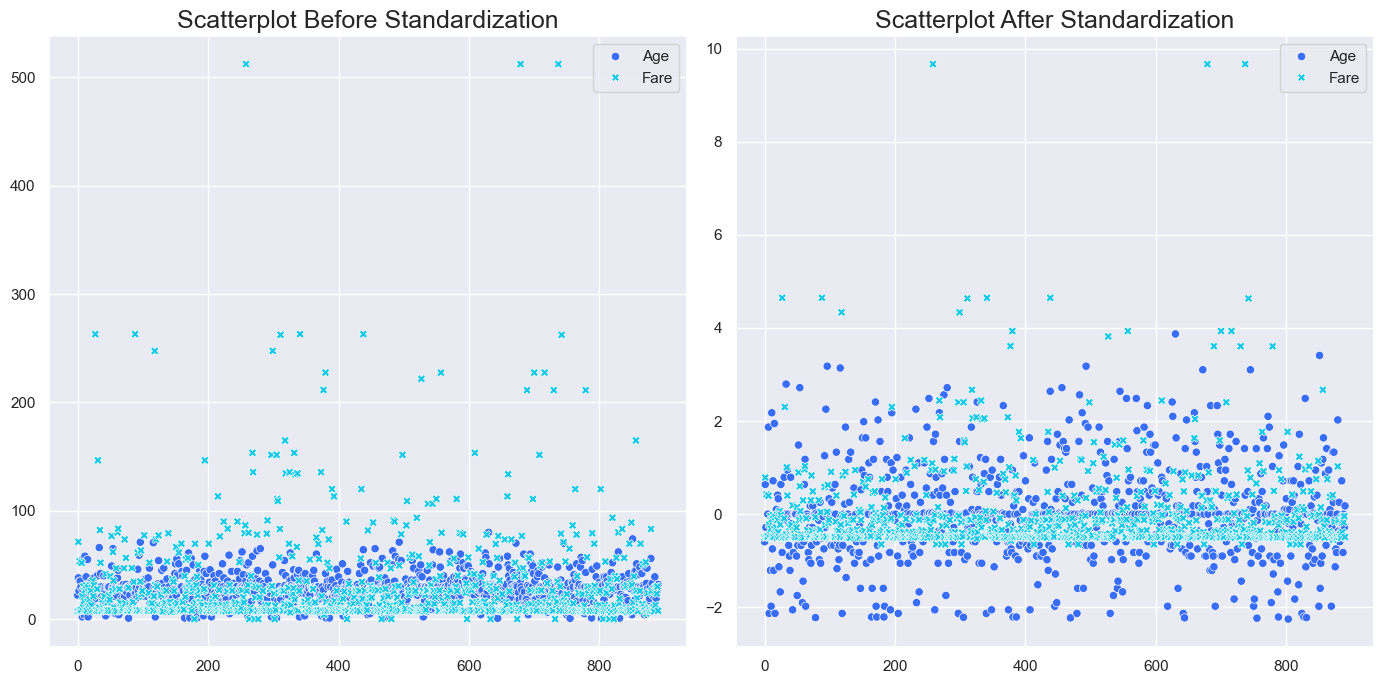

In [17]:
# plotting the scatterplot of before and after Standardization
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Standardization", fontsize=18)
sns.scatterplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Standardization", fontsize=18)
sns.scatterplot(data = df_new, color="red")
plt.tight_layout()
plt.show()

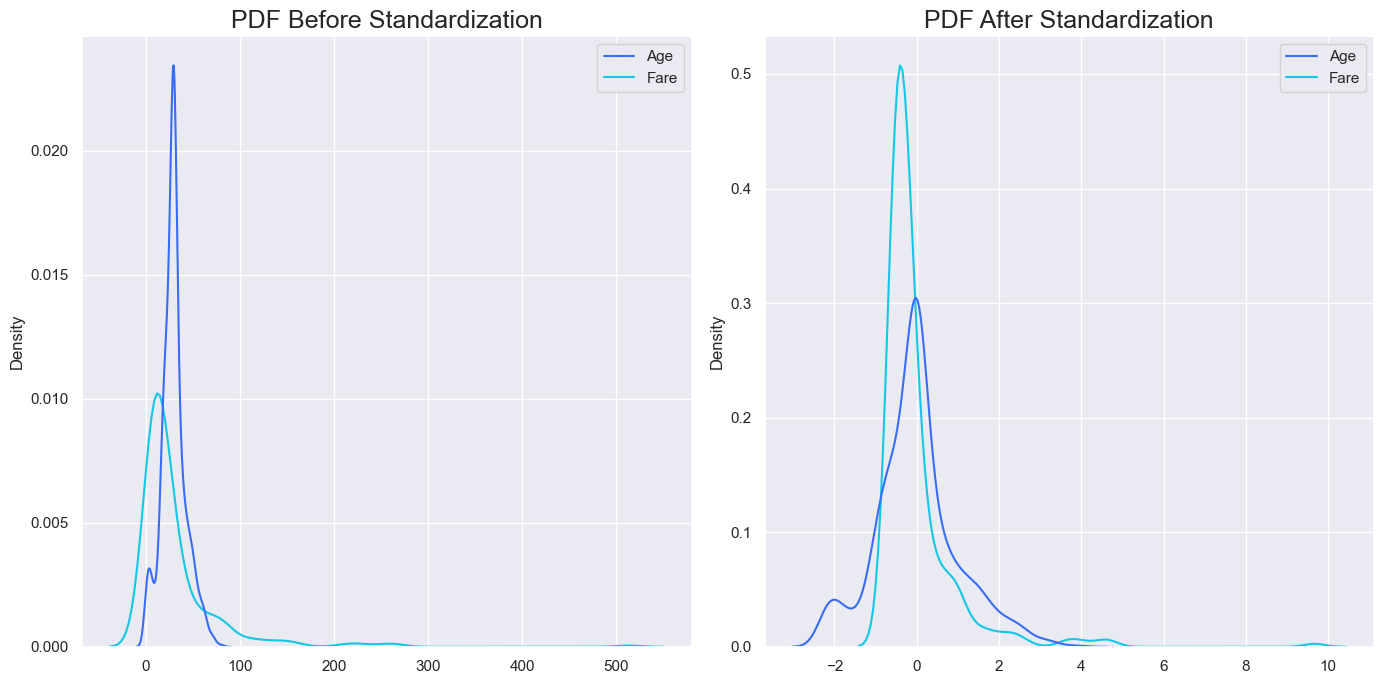

In [18]:
# plotting the scatterplot of before and after Standardization
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Standardization", fontsize=18)
sns.kdeplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Standardization", fontsize=18)
sns.kdeplot(data = df_new, color="red")
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="font-size:16px; font-family:nexa;">
    Notice how the mean of the distribution is very close to 0 and stadard deviation is exactly 1. This is what Standardization does. We had some outliers in Fare and that's why mean didn't reduce down to 0.<br>
    Also notice that how in the Scatterplot, the scale changed and the distribution came to the centre or 0. <br>
    In the probability density function, the kde plot is exactly the same, so this shows how the distribution is not effected by standardization.
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5F1666;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>Normalization</b>
        </p>
</div>
<div class="alert alert-block alert-info" style="font-size:16px; font-family:nexa;">
    Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#26785F;
           font-size:18px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 8px;
              color:white;">
            <b>1 . Min Max Scaling</b>
        </p>
</div>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#A9C9A9;
           font-size:16px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 8px;
              color:black;">
            Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.
        </p>
</div>

#### Formula of Min Max Scaling:

In [19]:
# importing sklearn Min Max Scaler class which is for Standardization
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler() # creating an instance of the class object
df_new_mm = pd.DataFrame(mm.fit_transform(df), columns=df.columns)  #fit and transforming MinMaxScaler the dataframe 

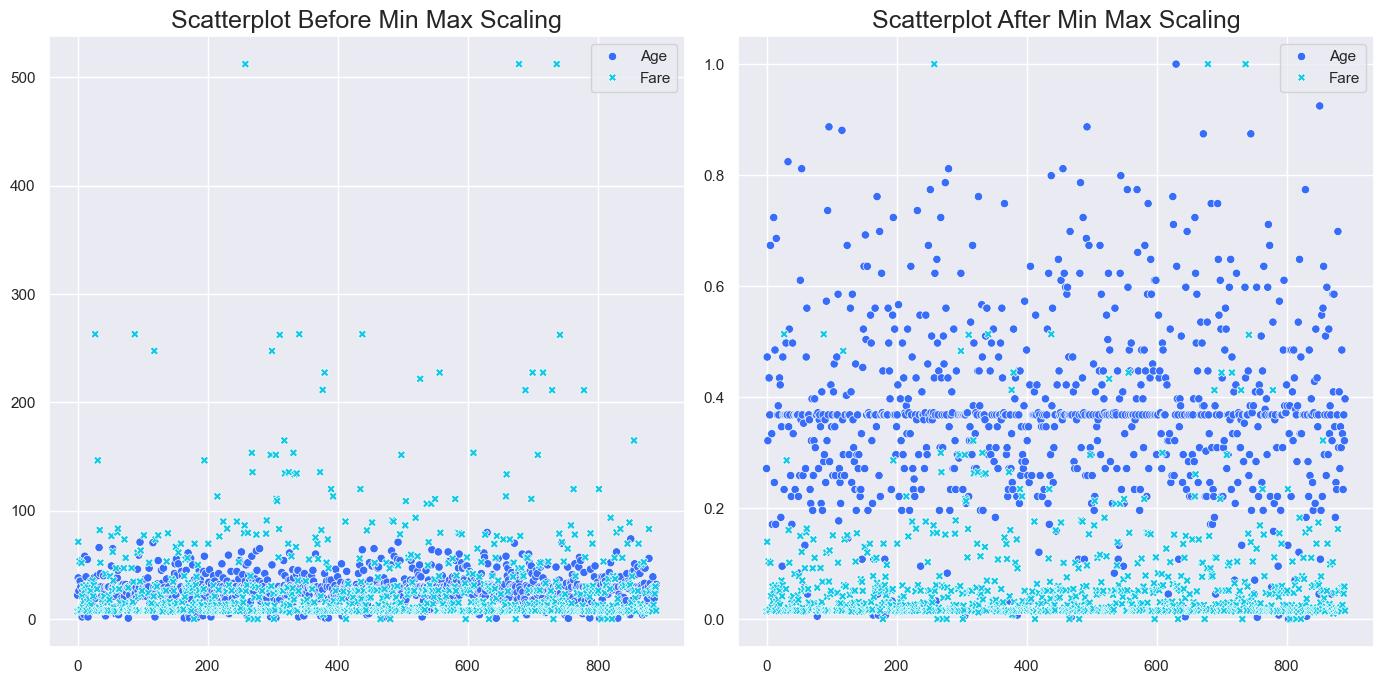

In [20]:
# plotting the scatterplot of before and after Min Max Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Min Max Scaling", fontsize=18)
sns.scatterplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Min Max Scaling", fontsize=18)
sns.scatterplot(data = df_new_mm, color="red")
plt.tight_layout()
plt.show()

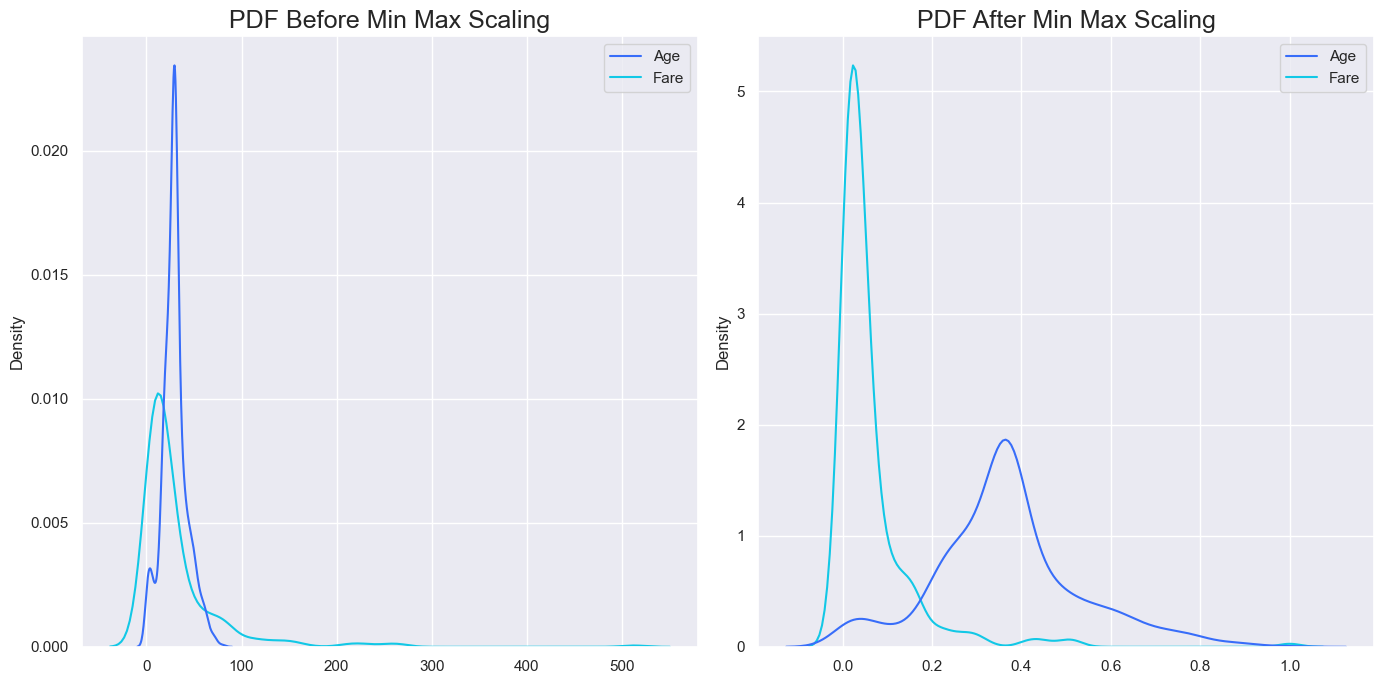

In [22]:
# plotting the scatterplot of before and after Min Max Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Min Max Scaling", fontsize=18)
sns.kdeplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Min Max Scaling", fontsize=18)
sns.kdeplot(data = df_new_mm, color="red")
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="font-size:16px; font-family:nexa;">
    Min Max Normalization will perform best when the maximum and minimum value is very distinct and known.
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#2A3162;
           font-size:18px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 8px;
              color:white;">
            <b>2 . Max Absolute Scaling</b>
        </p>
</div>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#D8E4FF;
           font-size:16px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 8px;
              color:black;">
            Scale each feature by its maximum absolute value.
This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.
This scaler can also be applied to sparse CSR or CSC matrices.
        </p>
</div>

#### Formula of Max Absolute Scaling:

In [23]:
# importing sklearn Min Max Scaler class which is for Max Absolute Scaling
from sklearn.preprocessing import MaxAbsScaler

ma = MaxAbsScaler() # creating an instance of the class object
df_new_ma = pd.DataFrame(ma.fit_transform(df), columns=df.columns)  #fit and transforming Max Absolute Scaling the dataframe 

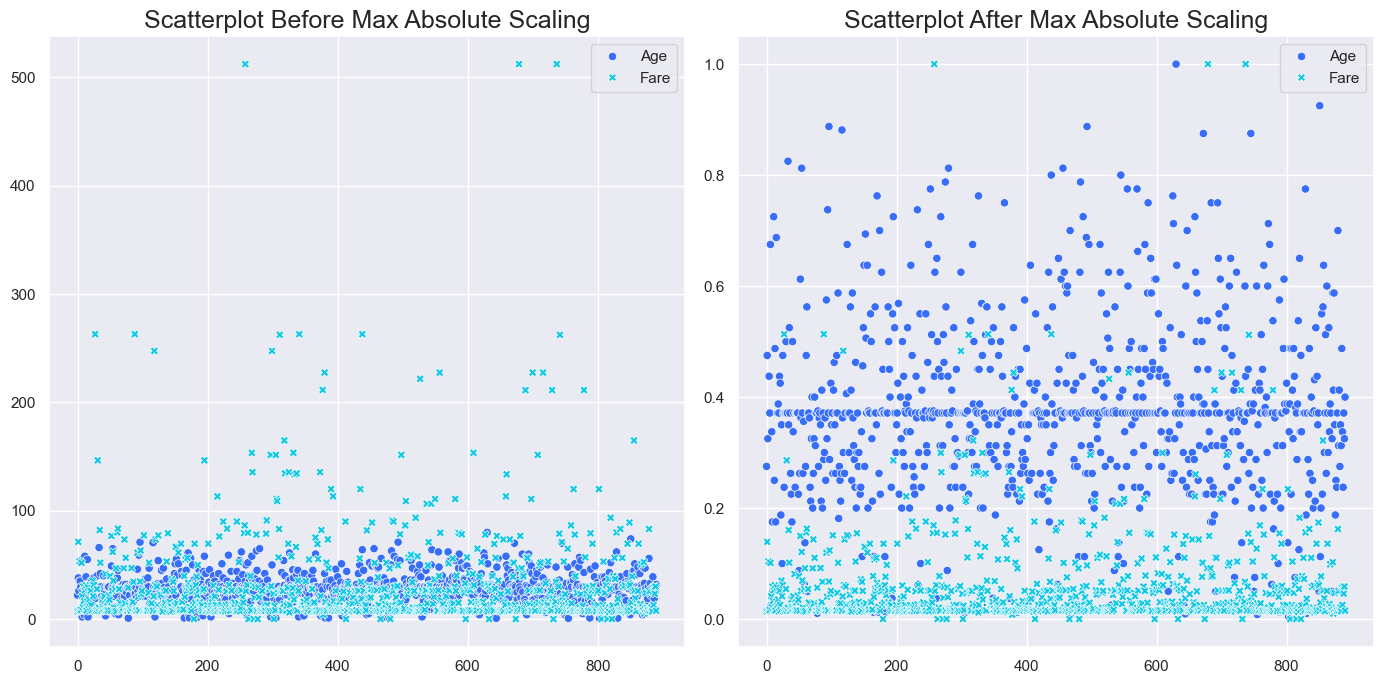

In [24]:
# plotting the scatterplot of before and after Max Absolute Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Max Absolute Scaling", fontsize=18)
sns.scatterplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Max Absolute Scaling", fontsize=18)
sns.scatterplot(data = df_new_ma, color="red")
plt.tight_layout()
plt.show()

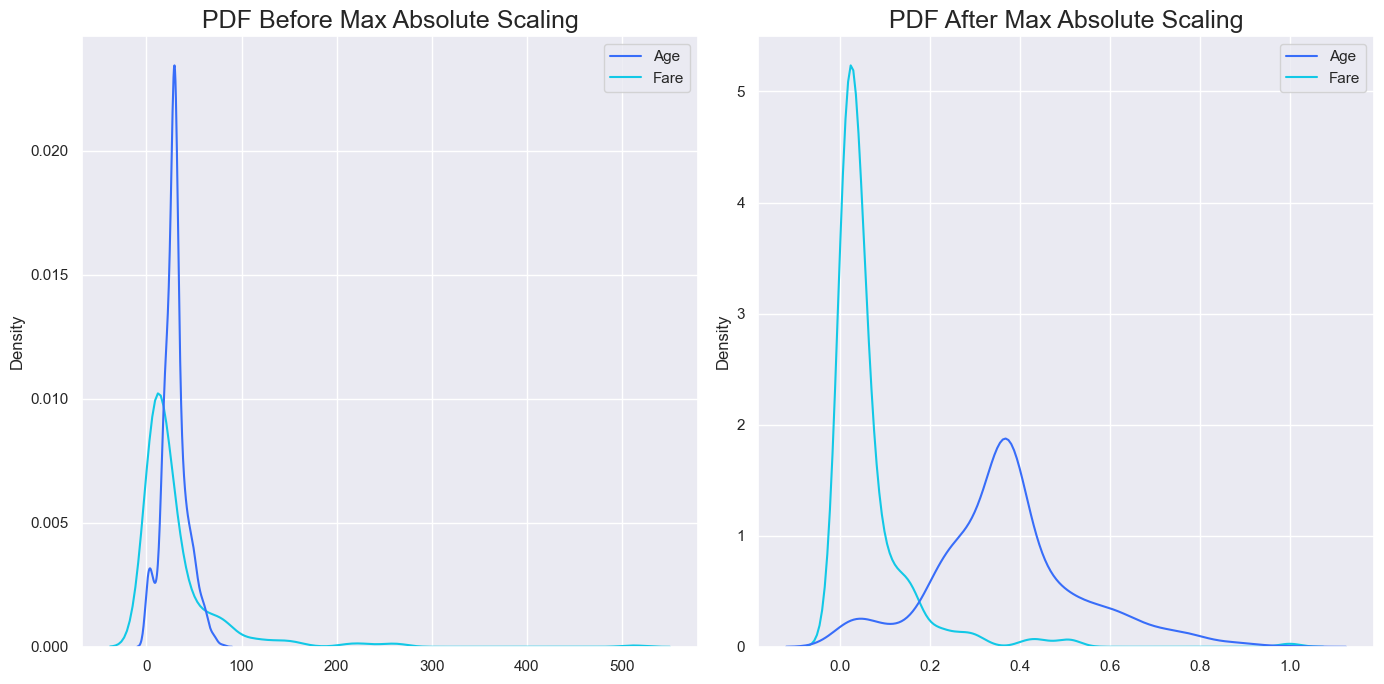

In [25]:
# plotting the scatterplot of before and after max Absolute Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Max Absolute Scaling", fontsize=18)
sns.kdeplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Max Absolute Scaling", fontsize=18)
sns.kdeplot(data = df_new_ma, color="red")
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="font-size:16px; font-family:nexa;">
    Max Absolute scaling will perform a lot better in sparse data or when most of the values are 0. 
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4E3626;
           font-size:18px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 8px;
              color:white;">
            <b>1 . Robust Scaling</b>
        </p>
</div>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EEC3B3;
           font-size:16px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 8px;
              color:black;">
           This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).
        </p>
</div>


#### Formula of Robust Scaling:

<img src="https://miro.medium.com/max/1008/1*N0cPiRvreurI_rKU55g1Eg.png"  alt="max abs formula" width="300" height="300">

In [26]:
# importing sklearn Min Max Scaler class which is for Robust scaling
from sklearn.preprocessing import RobustScaler

rs = RobustScaler() # creating an instance of the class object
df_new_rs = pd.DataFrame(rs.fit_transform(df), columns=df.columns)  #fit and transforming Robust Scaling the dataframe 

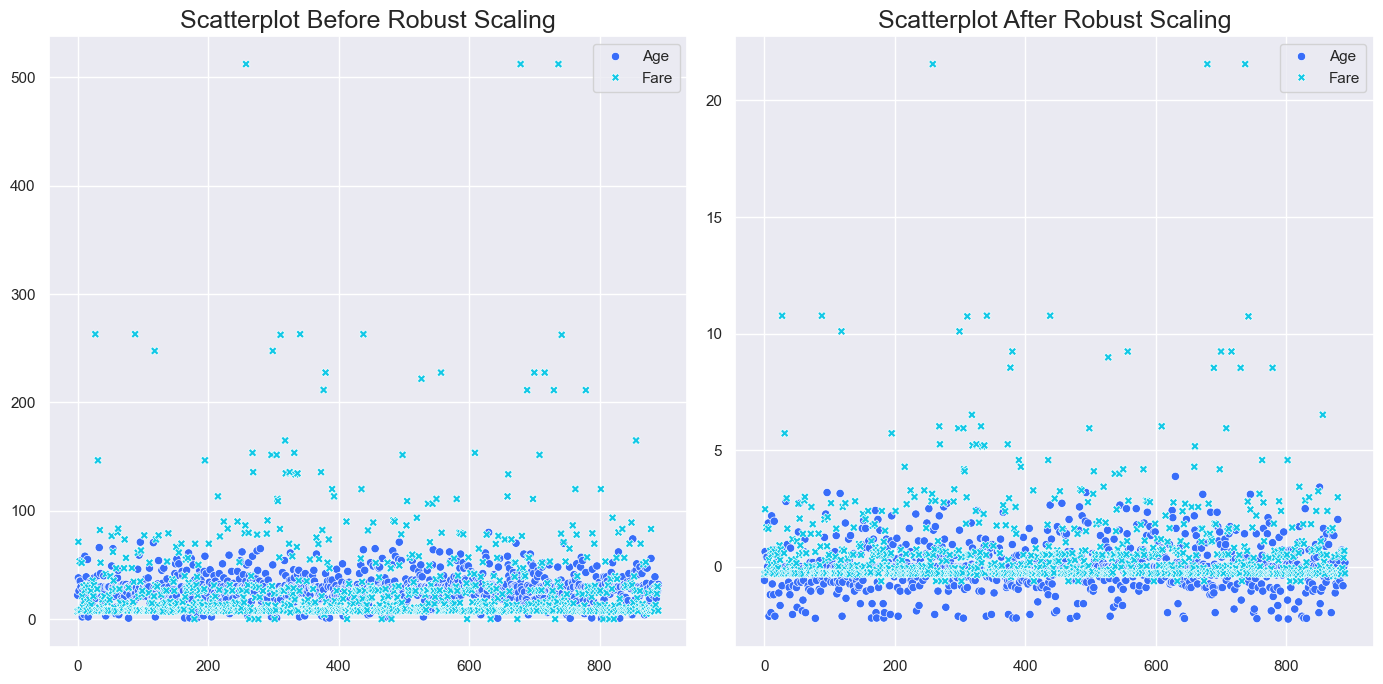

In [27]:
# plotting the scatterplot of before and after Robust Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Robust Scaling", fontsize=18)
sns.scatterplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Robust Scaling", fontsize=18)
sns.scatterplot(data = df_new_rs, color="red")
plt.tight_layout()
plt.show()

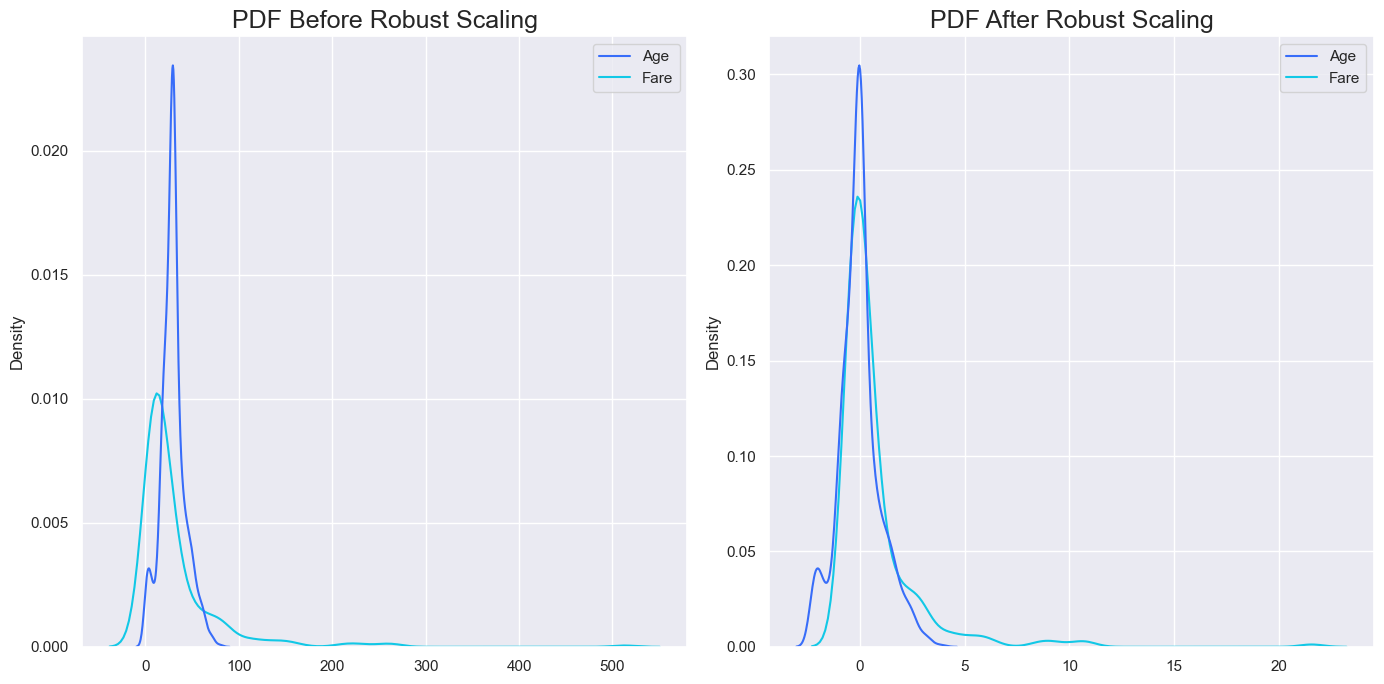

In [28]:
# plotting the scatterplot of before and after Robust Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Robust Scaling", fontsize=18)
sns.kdeplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Robust Scaling", fontsize=18)
sns.kdeplot(data = df_new_rs, color="red")
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="font-size:16px; font-family:nexa;">
    Robust Scaling is best for data that has outliers
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#58596D;
           font-size:18px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 8px;
              color:white;">
            <b>1 . Mean Normalization</b>
        </p>
</div>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#D0D6EB;
           font-size:16px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 8px;
              color:black;">
            It is very similar to Min Max Scaling, just that we use mean to normalize the data. Removes the mean from the data and scales it into max and min values.
        </p>
</div>

#### Formula of Mean Normalization:

<img src="https://miro.medium.com/max/920/1*TKTgR3jJNsDd77tZ-fOhxg.png" alt="max abs formula" width="300" height="300">

<div class="alert alert-block alert-info" style="font-size:16px; font-family:nexa;">
    Scikitlearn does not have any specific class for mean normalization. However, you can do this very easily using numpy.<br><br>
    <b>YOUR TASK:</b><br>
    Go ahead and try to code mean normalization using any dataset. Share the code in comments for other to see and discuss. <br> 
    Try the other ones as well that I have shared above. 
</div>

In [30]:
# Function to apply mean normalization
def mean_normalization(df):
    # Subtract mean and divide by range for each column
    return (df - df.mean()) / (df.max() - df.min())

# Applying mean normalization
df_new_mn = mean_normalization(df)


Original DataFrame:
           Age     Fare
0    22.000000   7.2500
1    38.000000  71.2833
2    26.000000   7.9250
3    35.000000  53.1000
4    35.000000   8.0500
..         ...      ...
886  27.000000  13.0000
887  19.000000  30.0000
888  29.699118  23.4500
889  26.000000  30.0000
890  32.000000   7.7500

[891 rows x 2 columns]

Mean Normalized DataFrame:
          Age      Fare
0   -0.096747 -0.048707
1    0.104309  0.076277
2   -0.046483 -0.047390
3    0.066611  0.040786
4    0.066611 -0.047146
..        ...       ...
886 -0.033917 -0.037484
887 -0.134445 -0.004302
888  0.000000 -0.017087
889 -0.046483 -0.004302
890  0.028913 -0.047731

[891 rows x 2 columns]


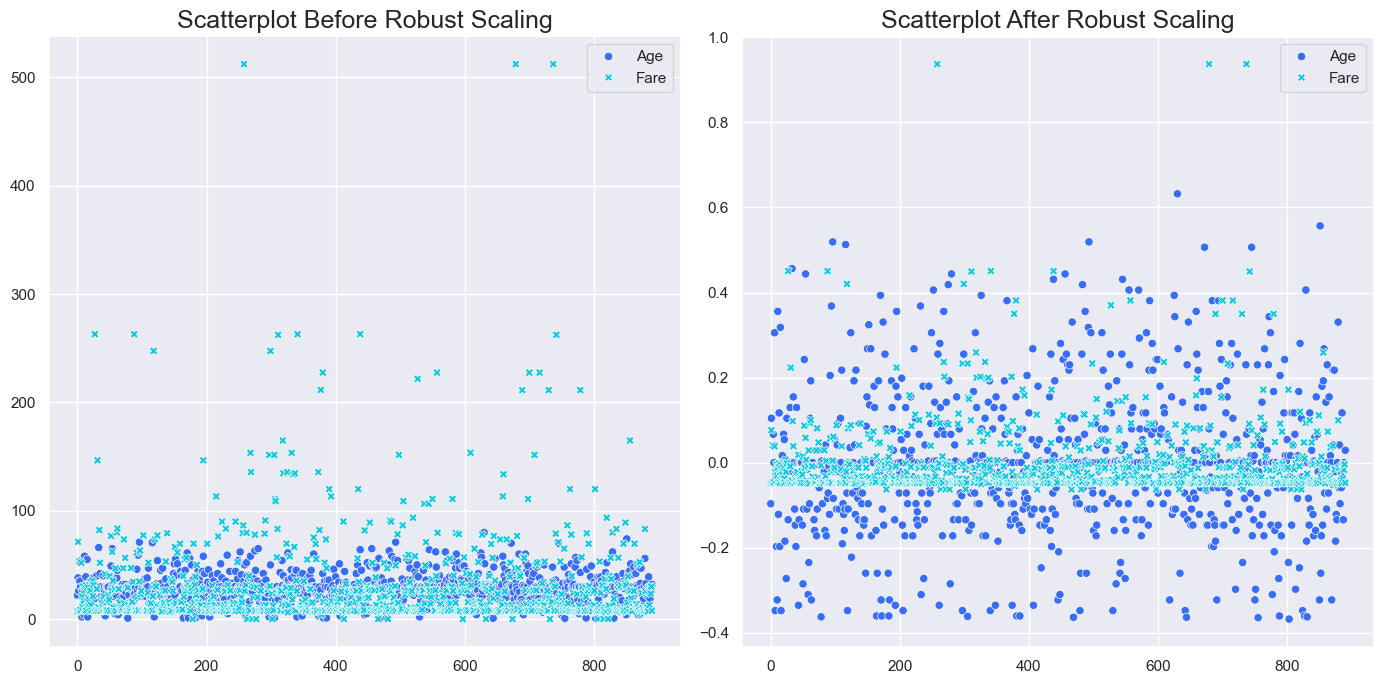

In [31]:
# plotting the scatterplot of before and after mean normalization
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Robust Scaling", fontsize=18)
sns.scatterplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Robust Scaling", fontsize=18)
sns.scatterplot(data = df_new_mn, color="red")
plt.tight_layout()
plt.show()

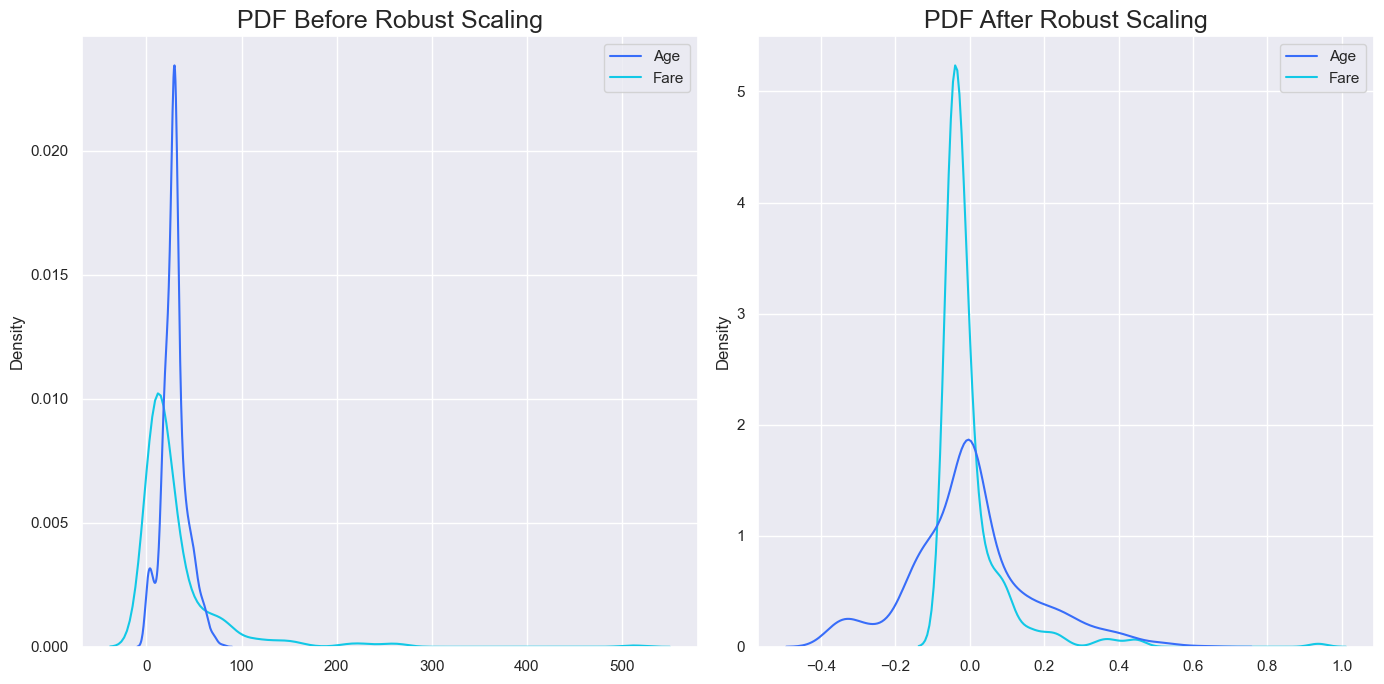

In [32]:
# plotting the scatterplot of before and after mean normalization
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Robust Scaling", fontsize=18)
sns.kdeplot(data = df, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Robust Scaling", fontsize=18)
sns.kdeplot(data = df_new_mn, color="red")
plt.tight_layout()
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>Conclusion and Tips!</b>
        </p>
</div>
<div class="alert alert-block alert-info" style="font-size:16px; font-family:nexa;">
    Don't get limited by your understanding while implementing these scalers. What I personally follow is trail and error method. In this world of ever changing tech, it is difficult to comprehend the mathematical nuiances of every bit of code that you write. It might be possible that you forget a certain formula a certain point of time. That should not effect your intuition though. That is the whole point of trail and error. Play with a single dataset and apply every scaler that I have shown you today. See the results for yourself. Go ahead and try it on other 5/6 datasets. Check the results and redo the models till the accuracy is good. This way you will have a very intuitive understanding of why a scaler performs better than the others in a very specific scenario. This intuition is hard to develop. <br><br>
    <b>Below I will share some basic tips that you can use while trying to scale:</b><br>
    1. If you do not know which scaler to use, apply all and check the effect on the models. <br> 
    2. If you do not understand the data, use standard scaler. It works most of the times. <br> 
    3. If you know the max and min values of the feature, then use min max scaler. Like in CNN. <br> 
    4. If most of the values in the feature column is 0 or sparce matrix, then use Max Absolute Scaling<br> 
    5. If the data has outliers, use Robust Scaling.<br> <br> <br> 
    <b>Thank you so much for reading till the end. You are a hero. Keep learning!<br>
        Also, if you liked the notebook, an upvote will definitely keep my motivation up!
</div>